In [34]:
%reload_ext autoreload
%autoreload 2

import sys, os
import copy
curr_path = str(globals()["_dh"][0])
print(curr_path)
sys.path.append(os.path.dirname(curr_path))

from image_utils import load_flickr_dataset, load_other_flickr_images, load_crepe_datasets, load_other_crepe_images
import os

from main import construct_qrels

import IPython

data_path="/data2/wuyinjun/"
query_path=os.path.dirname(curr_path) #curr_dir = str(globals()["_dh"][0])
print("query_path::",query_path)
dataset_name="crepe"

# dataset_name="flickr"
full_data_path = os.path.join(data_path, dataset_name)

# queries, img_file_name_ls, sub_queries_ls, img_idx_ls, grouped_sub_q_ids_ls = load_crepe_datasets(full_data_path, query_path, is_test=True)
#         # queries, raw_img_ls, sub_queries_ls, img_idx_ls = load_crepe_datasets_full(full_data_path, query_path)
# img_idx_ls, img_file_name_ls = load_other_crepe_images(full_data_path, query_path, img_idx_ls, img_file_name_ls, total_count = -1)

is_test=True

queries, img_file_name_ls, sub_queries_ls, img_idx_ls, grouped_sub_q_ids_ls = load_crepe_datasets(full_data_path, query_path, is_test=is_test)
# queries, raw_img_ls, sub_queries_ls, img_idx_ls = load_crepe_datasets_full(full_data_path, query_path)
img_idx_ls, img_file_name_ls = load_other_crepe_images(full_data_path, query_path, img_idx_ls, img_file_name_ls, total_count = -1)


cached_img_ls = copy.copy(img_idx_ls)
if is_test:
        tp_idx = cached_img_ls[0]
        cached_img_ls[0] = cached_img_ls[1]
        cached_img_ls[1] = tp_idx 
print(cached_img_ls)
print(img_idx_ls)

qrels, queries, subset_q_idx = construct_qrels(dataset_name, queries, cached_img_ls, img_idx_ls, query_count=-1)


# samples_hash = obtain_sample_hash(img_idx_ls, img_file_name_ls)
# # cached_img_idx_ls, image_embs, patch_activations, masks, bboxes, img_for_patch
# # if args.save_mask_bbox:
# cached_img_ls, img_emb, patch_emb_ls, _, bboxes_ls, img_per_patch_ls = convert_samples_to_concepts_img(args, samples_hash, model, img_file_name_ls, img_idx_ls, processor, device, patch_count_ls=patch_count_ls,save_mask_bbox=args.save_mask_bbox)


/home/wuyinjun/concept_based_retrieval/experiment_figures
query_path:: /home/wuyinjun/concept_based_retrieval


100%|██████████| 1/1 [00:00<00:00, 1573.26it/s]


[1, 5, 6, 7, 8, 9, 11, 13, 16, 23, 27, 30, 31, 34, 37, 38, 39, 40, 43, 47, 48, 53, 58, 60, 62, 64, 69, 72, 74, 79, 82, 97, 98, 130, 156, 166, 171, 179, 187, 194, 206, 221, 236, 239, 243, 246, 252, 265, 272, 277, 286, 291, 303, 313, 314, 320, 356, 368, 369, 375, 397, 414, 442, 444, 453, 462, 479, 492, 494, 502, 508, 524, 534, 538, 545, 556, 559, 560, 568, 578, 586, 597, 608, 621, 626, 630, 675, 681, 696, 697, 701, 714, 736, 738, 748, 759, 833, 870, 879, 889, 913, 917, 930, 934, 939, 940, 951, 955, 956, 964, 968, 986, 989, 991, 994, 997, 1001, 1015, 1017, 1020, 1027, 1034, 1040, 1042, 1043, 1053, 1057, 1066, 1090, 1091, 1114, 1115, 1129, 1145, 1150, 1159, 1170, 1179, 1183, 1184, 1185, 1196, 1199, 1216, 1233, 1241, 1269, 1270, 1285, 1314, 1321, 1326, 1327, 1339, 1345, 1346, 1351, 1373, 1378, 1392, 1466, 1473, 1501, 1528, 1532, 1549, 1891, 1925, 1928, 2066, 2114, 2275, 2480, 2643, 2704, 3114, 3173, 3367, 3371, 3433, 3548, 3587, 3616, 3636, 3764, 3766, 3784, 3851, 3914, 3996, 4126, 4167, 41

In [35]:
print(queries)
print(img_file_name_ls)
print(img_idx_ls)
print(qrels)
print(cached_img_ls)

['keyboard, computer monitor, printer, and fax machine on a desk, with a chair against the wall.']
['/data2/wuyinjun/crepe/VG_100K/5.jpg', '/data2/wuyinjun/crepe/VG_100K/1.jpg', '/data2/wuyinjun/crepe/VG_100K/6.jpg', '/data2/wuyinjun/crepe/VG_100K/7.jpg', '/data2/wuyinjun/crepe/VG_100K/8.jpg', '/data2/wuyinjun/crepe/VG_100K/9.jpg', '/data2/wuyinjun/crepe/VG_100K/11.jpg', '/data2/wuyinjun/crepe/VG_100K/13.jpg', '/data2/wuyinjun/crepe/VG_100K/16.jpg', '/data2/wuyinjun/crepe/VG_100K/23.jpg', '/data2/wuyinjun/crepe/VG_100K/27.jpg', '/data2/wuyinjun/crepe/VG_100K/30.jpg', '/data2/wuyinjun/crepe/VG_100K/31.jpg', '/data2/wuyinjun/crepe/VG_100K/34.jpg', '/data2/wuyinjun/crepe/VG_100K/37.jpg', '/data2/wuyinjun/crepe/VG_100K/38.jpg', '/data2/wuyinjun/crepe/VG_100K/39.jpg', '/data2/wuyinjun/crepe/VG_100K/40.jpg', '/data2/wuyinjun/crepe/VG_100K/43.jpg', '/data2/wuyinjun/crepe/VG_100K/47.jpg', '/data2/wuyinjun/crepe/VG_100K/48.jpg', '/data2/wuyinjun/crepe/VG_100K_2/53.jpg', '/data2/wuyinjun/crepe/V

In [36]:
print(qrels)

{'1': {'2': 2}}


In [26]:
idx = 0
# print(queries[0:10])
print(queries[idx])
print(sub_queries_ls[idx])
print(grouped_sub_q_ids_ls[idx])

keyboard, computer monitor, printer, and fax machine on a desk, with a chair against the wall.
[['keyboard on a desk', 'computer on a desk', 'monitor on a desk', 'printer on a desk', 'fax machine on a desk', 'a chair against the wall.']]
[[[0, 1, 2, 3], [4]]]


In [37]:
print(method_two_res[str(idx+1)])
print(baseline_res[str(idx+1)])

{'2': 0.009133262559771538, '59': 0.008282735012471676, '8': 0.008162319660186768, '7': 0.007861951366066933, '6': 0.007668040227144957, '44': 0.007601510733366013, '160': 0.007039017044007778, '5': 0.0065270764753222466, '14': 0.006499966140836477, '4': 0.006407439708709717, '74': 0.0062206885777413845, '12': 0.0052034892141819, '261': 0.005026171449571848, '103': 0.0050101010128855705, '11': 0.004866994917392731, '138': 0.004827029537409544, '69': 0.004753755871206522, '488': 0.00473746145144105, '170': 0.004615540616214275, '60': 0.004589746706187725, '329': 0.004581603221595287, '166': 0.004528719931840897, '116': 0.0044550709426403046, '35': 0.0043896837159991264, '134': 0.004256362095475197, '13': 0.004239967092871666, '19': 0.004142153076827526, '260': 0.004141514655202627, '366': 0.0041312966495752335, '455': 0.004085589665919542, '317': 0.004072834737598896, '147': 0.0040074605494737625, '104': 0.003998329862952232, '214': 0.003903978504240513, '417': 0.003895473200827837, '42

/data2/wuyinjun/crepe/VG_100K/9.jpg


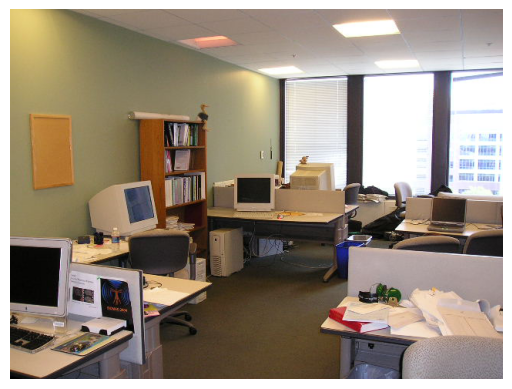

In [42]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
idx=5
# Load the image
image_path = img_file_name_ls[idx]
print(image_path)
# image_path="/data2/wuyinjun/flickr/flickr30k-images/1000366164.jpg"
image = mpimg.imread(image_path)

# plt.title("Sheep Image")
# plt.xlabel("X pixel scaling")
# plt.ylabel("Y pixel scaling")
plt.axis('off')
plt.imshow(image)
# plt.savefig("crepe_data/example.jpg", bbox_inches='tight', pad_inches=0)
plt.show()

In [22]:
import utils

baseline_res_file=os.path.join(os.path.dirname(curr_path), "output/saved_patches_crepe_4_8_16_64_128_method_one_test.pkl")
method_two_res_file=os.path.join(os.path.dirname(curr_path), "output/saved_patches_crepe_4_8_16_64_128_query_img_method_two_test.pkl")
method_four_res_file=os.path.join(os.path.dirname(curr_path), "output/saved_patches_crepe_4_8_16_64_128_query_img_method_four_test.pkl")


baseline_res = utils.load(baseline_res_file)
method_two_res = utils.load(method_two_res_file)
method_four_res = utils.load(method_four_res_file)

In [24]:
from beir.retrieval.evaluation import EvaluateRetrieval
from beir.retrieval.search.dense import DenseRetrievalExactSearch as DRES


retrieval_model = DRES(batch_size=16, algebra_method="two", is_img_retrieval=True, prob_agg="prod", dependency_topk=20)
# else:
#     retrieval_model = DRES(models.SentenceBERT("msmarco-distilbert-base-tas-b"), batch_size=16, algebra_method=one)
retriever = EvaluateRetrieval(retrieval_model, score_function="cos_sim") # or "cos_sim" for cosine similarity

print(list(qrels.keys()))
print(list(method_two_res.keys()))

# for key in qrels:
key = "1"
# ndcg0, _map0, recall0, precision0 = retriever.evaluate({key:qrels[key]}, {key:baseline_res[key]}, retriever.k_values, ignore_identical_ids=False)
# ndcg1, _map1, recall1, precision1 = retriever.evaluate({key:qrels[key]}, {key:method_two_res[key]}, retriever.k_values, ignore_identical_ids=False)
ndcg2, _map2, recall2, precision2 = retriever.evaluate({key:qrels[key]}, {key:method_four_res[key]}, retriever.k_values, ignore_identical_ids=False)

# if (ndcg2["NDCG@3"] > ndcg1["NDCG@3"] or ndcg2["NDCG@1"] > ndcg1["NDCG@1"]) and (ndcg1["NDCG@3"] > ndcg0["NDCG@3"]):
print(key, ndcg0, ndcg1, ndcg2)
    

2024-07-17 05:27:16,885 - 

2024-07-17 05:27:16,886 - NDCG@1: 0.0000
2024-07-17 05:27:16,887 - NDCG@3: 0.0000
2024-07-17 05:27:16,887 - NDCG@5: 0.0000
2024-07-17 05:27:16,888 - NDCG@10: 0.0000
2024-07-17 05:27:16,889 - NDCG@100: 0.0000
2024-07-17 05:27:16,889 - NDCG@1000: 0.1129
2024-07-17 05:27:16,890 - 

2024-07-17 05:27:16,891 - MAP@1: 0.0000
2024-07-17 05:27:16,891 - MAP@3: 0.0000
2024-07-17 05:27:16,892 - MAP@5: 0.0000
2024-07-17 05:27:16,893 - MAP@10: 0.0000
2024-07-17 05:27:16,894 - MAP@100: 0.0000
2024-07-17 05:27:16,894 - MAP@1000: 0.0022
2024-07-17 05:27:16,895 - 

2024-07-17 05:27:16,895 - Recall@1: 0.0000
2024-07-17 05:27:16,895 - Recall@3: 0.0000
2024-07-17 05:27:16,896 - Recall@5: 0.0000
2024-07-17 05:27:16,898 - Recall@10: 0.0000
2024-07-17 05:27:16,899 - Recall@100: 0.0000
2024-07-17 05:27:16,899 - Recall@1000: 1.0000
2024-07-17 05:27:16,900 - 

2024-07-17 05:27:16,900 - P@1: 0.0000
2024-07-17 05:27:16,901 - P@3: 0.0000
2024-07-17 05:27:16,901 - P@5: 0.0000
2024-07-17 0

['1']
['1']
1 {'NDCG@1': 0.0, 'NDCG@3': 0.0, 'NDCG@5': 0.0, 'NDCG@10': 0.0, 'NDCG@100': 0.0, 'NDCG@1000': 0.11258} {'NDCG@1': 0.0, 'NDCG@3': 0.0, 'NDCG@5': 0.0, 'NDCG@10': 0.0, 'NDCG@100': 0.0, 'NDCG@1000': 0.11375} {'NDCG@1': 0.0, 'NDCG@3': 0.0, 'NDCG@5': 0.0, 'NDCG@10': 0.0, 'NDCG@100': 0.0, 'NDCG@1000': 0.11293}
